
--- Delay Statistics ---
File:            delays.txt
Count:           406452
Mean Delay:      0.000012301 s
Median Delay:    0.000001322 s
Std Deviation:   0.000040976 s
Min Delay:       0.000001170 s
Max Delay:       0.000176985 s
95th Percentile: 0.000167248 s
99th Percentile: 0.000170049 s
------------------------

Histogram saved to delay_histogram.png


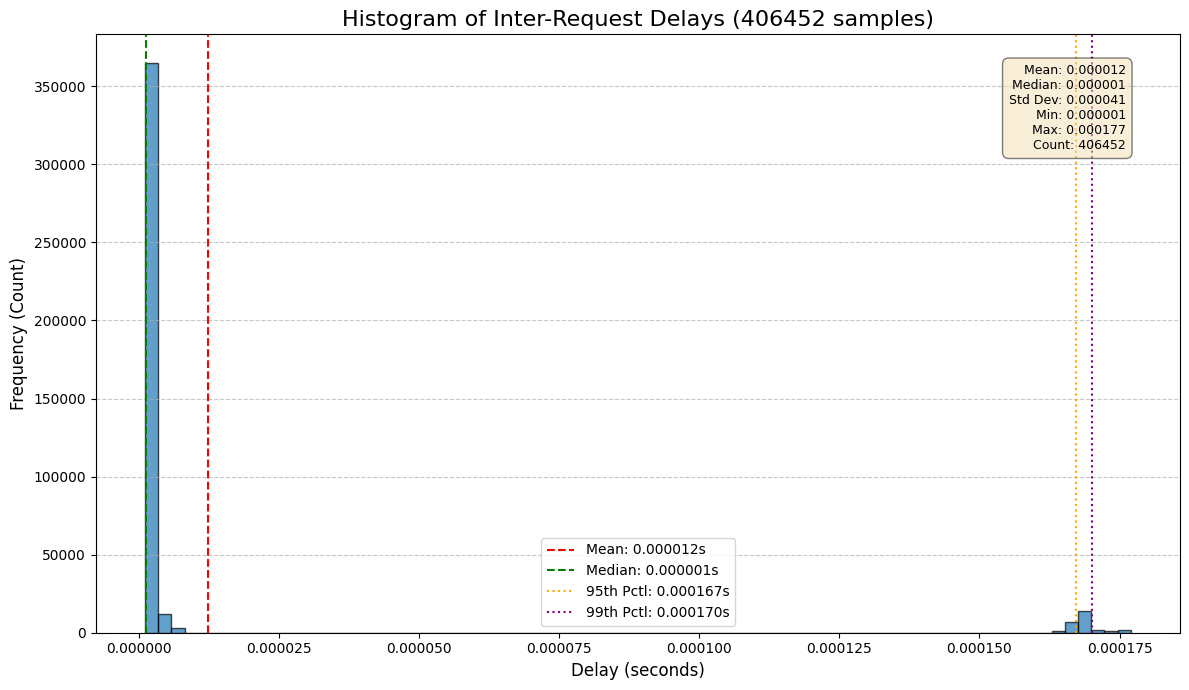

In [5]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os # Import os module for file path handling

# Ensure plots appear inline in Jupyter notebooks (usually default, but good practice)
%matplotlib inline

def visualize_delays(filepath="delays.txt", output_png="delay_histogram.png", bins=50):
    """
    Reads delay data from a file and generates a histogram.

    Args:
        filepath (str): The path to the delay data file (e.g., "delays.txt").
                        Assumes a header row and one delay per line.
        output_png (str): The filename to save the histogram image.
        bins (int): The number of bins to use for the histogram.
    """
    try:
        # Check if the file exists
        if not os.path.exists(filepath):
            print(f"Error: File not found at {filepath}")
            print(f"Current working directory: {os.getcwd()}")
            return

        # Read the data using pandas, assuming the first row is the header
        data = pd.read_csv(filepath, header=0)

        # Check if the expected column exists
        if 'Delay_Seconds' not in data.columns:
            print(f"Error: Column 'Delay_Seconds' not found in {filepath}.")
            print(f"Available columns: {list(data.columns)}")
            return

        delays = data['Delay_Seconds'].to_numpy()

        if len(delays) == 0:
            print(f"Error: No delay data found in column 'Delay_Seconds' in {filepath}")
            return

        # --- Basic statistics ---
        mean_delay = np.mean(delays)
        median_delay = np.median(delays)
        std_dev = np.std(delays)
        min_delay = np.min(delays)
        max_delay = np.max(delays)
        p95 = np.percentile(delays, 95)
        p99 = np.percentile(delays, 99)

        print("\n--- Delay Statistics ---")
        print(f"File:            {filepath}")
        print(f"Count:           {len(delays)}")
        print(f"Mean Delay:      {mean_delay:.9f} s")
        print(f"Median Delay:    {median_delay:.9f} s")
        print(f"Std Deviation:   {std_dev:.9f} s")
        print(f"Min Delay:       {min_delay:.9f} s")
        print(f"Max Delay:       {max_delay:.9f} s")
        print(f"95th Percentile: {p95:.9f} s")
        print(f"99th Percentile: {p99:.9f} s")
        print("------------------------\n")
        # --- End Statistics ---

        # --- Create the histogram ---
        plt.figure(figsize=(12, 7)) # Slightly larger figure size
        counts, bin_edges, patches = plt.hist(delays, bins=bins, edgecolor='black', alpha=0.7)

        # Add titles and labels
        plt.title(f'Histogram of Inter-Request Delays ({len(delays)} samples)', fontsize=16)
        plt.xlabel('Delay (seconds)', fontsize=12)
        plt.ylabel('Frequency (Count)', fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        # Add mean/median lines
        plt.axvline(mean_delay, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_delay:.6f}s')
        plt.axvline(median_delay, color='green', linestyle='dashed', linewidth=1.5, label=f'Median: {median_delay:.6f}s')
        plt.axvline(p95, color='orange', linestyle='dotted', linewidth=1.5, label=f'95th Pctl: {p95:.6f}s')
        plt.axvline(p99, color='purple', linestyle='dotted', linewidth=1.5, label=f'99th Pctl: {p99:.6f}s')

        # Add text annotation for key stats inside the plot
        stats_text = (f"Mean: {mean_delay:.6f}\n"
                      f"Median: {median_delay:.6f}\n"
                      f"Std Dev: {std_dev:.6f}\n"
                      f"Min: {min_delay:.6f}\n"
                      f"Max: {max_delay:.6f}\n"
                      f"Count: {len(delays)}")
        # Position the text box; adjust x, y as needed (relative coordinates 0-1)
        plt.text(0.95, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=9,
                 verticalalignment='top', horizontalalignment='right',
                 bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

        plt.legend(fontsize=10)

        # Adjust x-axis limits if max delay is very large compared to others, maybe log scale?
        # Example: Focus on the bulk of the data
        # plt.xlim(0, p99 * 1.2) # Zoom in, adjust multiplier as needed

        # Improve layout and save
        plt.tight_layout()
        try:
            plt.savefig(output_png)
            print(f"Histogram saved to {output_png}")
        except Exception as e:
            print(f"Error saving histogram to {output_png}: {e}")

    except FileNotFoundError: # This case is handled by os.path.exists check above
        pass # Error message already printed
    except pd.errors.EmptyDataError:
         print(f"Error: File {filepath} is empty or has no columns to parse after the header.")
    except KeyError: # This case is handled by the 'in data.columns' check above
        pass # Error message already printed
    except Exception as e:
        print(f"An unexpected error occurred during plotting: {e}")
        import traceback
        traceback.print_exc() # Print detailed traceback for debugging



#    Make sure 'delays.txt' is in the same directory as the notebook,
#    or provide the full path.

file_to_analyze = "delays.txt"
output_image_file = "delay_histogram.png"
number_of_bins = 75 # Example: increased bins

# Call the function
visualize_delays(filepath=file_to_analyze,
                 output_png=output_image_file,
                 bins=number_of_bins)